In [2]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('alzheimer.csv')
df.head()


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [18]:
df =df.drop(df[df["Group"]=="Converted"].index)
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [19]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['M/F'].values)
df.iloc[:, 1] = y
y = class_le.fit_transform(df['Group'].values)
df.iloc[:, 0] = y
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,0,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,0,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
#from sklearn.model_selection import train_test_split
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
#print('Class label distribution: %s' %np.bincount(y_train)[1:])

In [20]:
df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [22]:
df = df.dropna(axis = 0)
df.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [23]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [16]:
'''
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
#imputed_data
df = pd.DataFrame(imputed_data, columns = ['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'])
'''

"\nfrom sklearn.impute import SimpleImputer\nimport numpy as np\n\nimr = SimpleImputer(missing_values=np.nan, strategy='mean')\nimr = imr.fit(df.values)\nimputed_data = imr.transform(df.values)\n#imputed_data\ndf = pd.DataFrame(imputed_data, columns = ['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',\n       'ASF'])\n"

In [24]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,1,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,1,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [25]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [26]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = '11', solver = 'liblinear', multi_class = 'ovr')

LogisticRegression(multi_class='ovr', penalty='11', solver='liblinear')

In [35]:
lr = LogisticRegression(penalty = 'l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  0.995475113122172
Test accuracy:  0.9895833333333334


In [36]:
lr.intercept_

array([0.])

In [37]:
lr.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.02500166,  0.58662866,
        -6.02620697,  0.14206778,  0.        ,  0.        ]])

IndexError: index 1 is out of bounds for axis 0 with size 1

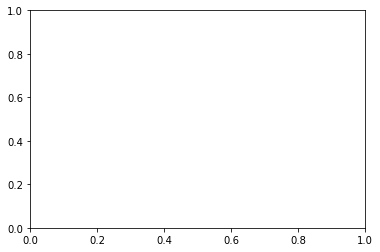

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
print(weights[:, 0])

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

## Feature selection

### Sequential feature selection algorithms

In [38]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [39]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

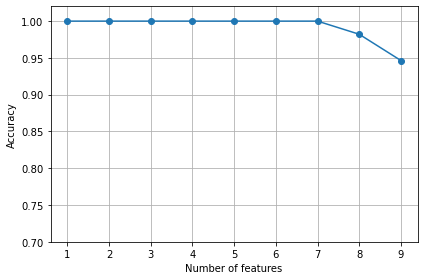

In [40]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
k3 = list(sbs.subsets_[8])
print(df.columns[1:][k3])

Index(['CDR'], dtype='object')


In [42]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.9773755656108597
Test accuracy:  0.9375


In [43]:
knn.fit(X_train_std[:, k3], y_train)
print('Traning Accuracy: ', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy; ', knn.score(X_test_std[:, k3], y_test))

#The result  is disaster.

Traning Accuracy:  0.995475113122172
Test accuracy;  0.9895833333333334


### Random Forests: Assessing Feature importance

 1 CDR                            0.668619
 2 MMSE                           0.189568
 3 nWBV                           0.046163
 4 eTIV                           0.022264
 5 EDUC                           0.019964
 6 ASF                            0.018921
 7 Age                            0.017019
 8 SES                            0.009935
 9 M/F                            0.007546


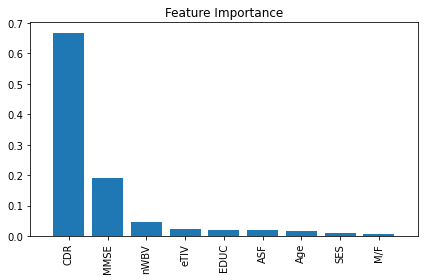

In [46]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f" %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim ([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

In [47]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 2
 1) CDR                            0.668619
 2) MMSE                           0.189568


#### Based on the above result, the 5th column (MMSE) and the 6th column (CDR) are good option for feature selection to work with

### ---------------------------------------------------------------------------------------------------------------

### Compressing Data via Dimensionality Reduction

In [48]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [49]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n\ncov_mat: \n%s' %cov_mat)

print('\n\nEigneValues \n%s'% eigen_vals)
print('\n\nEigenVectors: \n%s'% eigen_vecs)



cov_mat: 
[[ 1.00454545 -0.03685898  0.01486469 -0.01181025 -0.13855066  0.17319809
   0.53467955 -0.25251605 -0.52339131]
 [-0.03685898  1.00454545 -0.08664272  0.02168459  0.02310512 -0.08339799
   0.06514404 -0.49461516 -0.05842469]
 [ 0.01486469 -0.08664272  1.00454545 -0.71522084  0.21848442 -0.19990265
   0.25696165  0.00802147 -0.24432263]
 [-0.01181025  0.02168459 -0.71522084  1.00454545 -0.15685257  0.12778926
  -0.29550882  0.03307132  0.28941562]
 [-0.13855066  0.02310512  0.21848442 -0.15685257  1.00454545 -0.74932636
   0.05398329  0.37112117 -0.04007657]
 [ 0.17319809 -0.08339799 -0.19990265  0.12778926 -0.74932636  1.00454545
  -0.04813817 -0.36745783  0.03595024]
 [ 0.53467955  0.06514404  0.25696165 -0.29550882  0.05398329 -0.04813817
   1.00454545 -0.20206059 -0.99214903]
 [-0.25251605 -0.49461516  0.00802147  0.03307132  0.37112117 -0.36745783
  -0.20206059  1.00454545  0.20667304]
 [-0.52339131 -0.05842469 -0.24432263  0.28941562 -0.04007657  0.03595024
  -0.99214

var_exp [0.3025902407131817, 0.2527723548342333, 0.14578787302368676, 0.1434524376437399, 0.05955727151800596, 0.03681320795564802, 0.030726213236135565, 0.026972274148189895, 0.0013281269271789306]
Cum_var_exp [0.30259024 0.5553626  0.70115047 0.84460291 0.90416018 0.94097339
 0.9716996  0.99867187 1.        ]


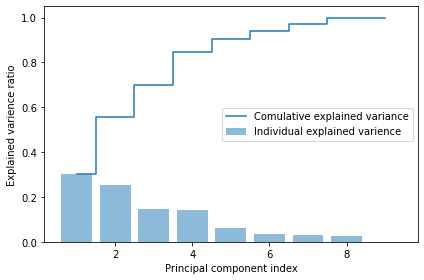

In [50]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
print('var_exp', var_exp)
cum_var_exp = np.cumsum(var_exp)
print('Cum_var_exp', cum_var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 10), var_exp, alpha=0.5, align='center', label='Individual explained varience')
plt.step(range(1, 10), cum_var_exp, where='mid', label='Comulative explained variance')

plt.ylabel('Explained varience ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Up to the 4th columns of the data, it covering almost 85% of the data. 

In [51]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
print(eigen_pairs)

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort (key=lambda k: k[0], reverse=True)
print('Eigen Pairs: ', eigen_pairs)

[(2.7356908580841717, array([ 0.36682805,  0.07059275,  0.3027909 , -0.32471589,  0.03997503,
       -0.02853862,  0.55988217, -0.1955847 , -0.55605506])), (2.2852918807513163, array([-0.23448184, -0.13972301,  0.31953744, -0.26923827,  0.53953961,
       -0.53204889, -0.03508029,  0.41670564,  0.04300114])), (1.2969404476063564, array([ 0.28787695, -0.00184846, -0.52853183,  0.55810453,  0.28643007,
       -0.29876046,  0.23235083,  0.21832999, -0.23095886])), (1.3180549065641485, array([ 0.19408237, -0.79698129,  0.04913727, -0.01801389, -0.21990689,
        0.27487101,  0.0574036 ,  0.43964081, -0.06262243])), (0.5384518774968806, array([-0.77720932,  0.06541925, -0.19670955,  0.00318476, -0.21281847,
        0.1057288 ,  0.34022245,  0.21455667, -0.36702185])), (0.012007474809813139, array([-0.01730539, -0.01068455, -0.01227828, -0.00211962, -0.00618172,
        0.00157438,  0.71242422, -0.00765178,  0.70127284])), (0.3328248664717447, array([-0.29062246, -0.51762335,  0.16504137, 

In [52]:
w =  np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

Matrix W: 
 [[ 0.36682805 -0.23448184]
 [ 0.07059275 -0.13972301]
 [ 0.3027909   0.31953744]
 [-0.32471589 -0.26923827]
 [ 0.03997503  0.53953961]
 [-0.02853862 -0.53204889]
 [ 0.55988217 -0.03508029]
 [-0.1955847   0.41670564]
 [-0.55605506  0.04300114]]


In [53]:
X_train_std[0].dot(w)

array([0.44068843, 1.0661304 ])

In [54]:
X_train_pca = X_train_std.dot(w)
print(X_train_pca)

[[ 4.40688429e-01  1.06613040e+00]
 [-1.22963683e+00  4.54092510e-01]
 [-9.07970778e-01  1.27097820e+00]
 [ 1.76942123e+00  5.10638573e-01]
 [ 3.07248918e+00  1.48103797e+00]
 [-1.87484241e+00  2.69464605e-01]
 [ 3.05575458e+00  9.34989650e-01]
 [-9.65003633e-01 -2.89536672e+00]
 [ 1.23512685e+00 -1.84294336e+00]
 [ 1.16930166e+00  7.17488518e-01]
 [ 2.63042187e+00  6.64461146e-01]
 [ 2.25930352e+00  8.41658023e-01]
 [-1.90383399e+00  1.34632278e-01]
 [-1.60605946e-01  7.52981958e-01]
 [ 2.21267190e+00  8.17514450e-01]
 [-3.67413882e-03 -3.04691152e-01]
 [-1.30917242e-01  1.05365279e+00]
 [ 2.97540425e+00  9.41967303e-01]
 [ 2.57344729e+00 -1.08061929e+00]
 [-5.48104045e-01  3.06130010e+00]
 [-1.77035265e+00  9.30941394e-02]
 [ 3.19878476e+00  6.42321280e-01]
 [ 2.26093313e+00  1.40861310e+00]
 [-1.42608163e+00  2.29637018e+00]
 [-4.32852014e+00 -1.93467318e+00]
 [-1.17311874e+00  8.50231569e-01]
 [-7.93975009e-01 -4.86361536e-01]
 [-2.21335931e+00 -2.58833563e+00]
 [-1.95556745e+00  2

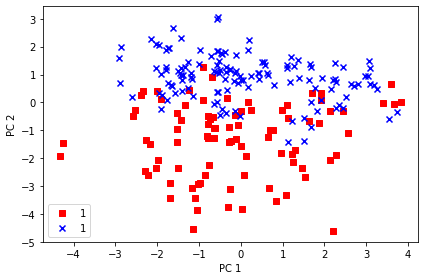

In [55]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
               X_train_pca[y_train==l, 1],
               c=c, label =1, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Linear Discriminant analysis

In [57]:
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1, 2): 
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis = 0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [-0.1733  0.0454  0.1907 -0.1355  0.506  -0.7234  0.0732  0.2731 -0.0679]



In [58]:
d = 9 #number of features
S_W = np.zeros((d,d))

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d))

for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
    
print('Within class scatter matrix: %sx%s' %(S_W.shape[0], S_W.shape[1]))

Within class scatter matrix: 9x9


In [59]:
d = 9 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 9x9


In [60]:
mean_overall = np.mean(X_train_std, axis = 0)
d = 9 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n= X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    
print('Between-class scatter matrix: %sx%s' %(S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 9x9


In [61]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [62]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted (eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

5608.446398455123
1.4654821211813187e-13
7.00902411947177e-14
4.428006808572422e-14
6.46921486074233e-15
6.46921486074233e-15
2.5750421855126524e-15
1.7900869584600863e-15
0.0


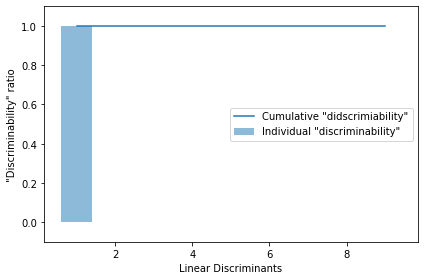

In [63]:
tot = sum (eigen_vals.real)
discr = [(i / tot) for i in sorted (eigen_vals.real, reverse=True)]

cum_discr = np.cumsum(discr)
plt.bar(range(1,10), discr, alpha = 0.5, align = 'center', label='Individual "discriminability"')
plt.step(range(1, 10), cum_discr, where = 'mid', label='Cumulative "didscrimiability"')

plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Linear Discriminative analysis is focusing just on CDR column. 

### -----------------------------------------------------------------

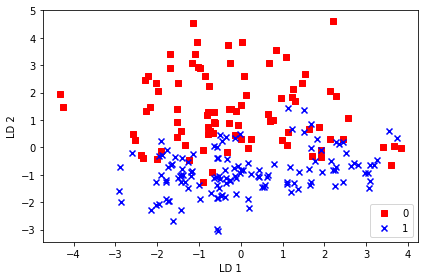

In [64]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1] * (-1), c=c, label = l, marker = m)
    
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## LDA via scikit-learn

In [74]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [78]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [79]:
lr = LogisticRegression(multi_class='ovr', random_state = 1, solver = 'lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

#### Based on the above outcome, it shows that working with the two columns would be with much more errors that expected. 